In [1]:
import pandas as pd

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 
import seaborn as sns 

In [2]:
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "axes.titlesize": 24,        # Larger axes/title fonts
        "legend.fontsize": 24,
    }
)
sns.set_context("talk")

In [3]:
palette_name = 'ocean_sunset'
palette = json.load(open(f'../palettes/{palette_name}.json', 'r'))

In [4]:
palette

{'Rich black': '#001219',
 'Midnight green': '#005f73',
 'Dark cyan': '#0a9396',
 'Tiffany Blue': '#94d2bd',
 'Vanilla': '#e9d8a6',
 'Gamboge': '#ee9b00',
 'Alloy orange': '#ca6702',
 'Rust': '#bb3e03',
 'Rufous': '#ae2012',
 'Auburn': '#9b2226'}

## SipIT

In [5]:
all_dfs = []

layer_to_df = {}
for file in os.listdir('../data/sipit_layer_ablation/'):
    layer_idx = int(file.replace('layer', ''))
    csv_path = f"../data/sipit_layer_ablation/layer{layer_idx}/results-0-0.10.csv"
    df = pd.read_csv(csv_path)
    layer_to_df[layer_idx] = df

    all_dfs.append(df)

df_sipit = pd.concat(all_dfs, ignore_index=True)

In [6]:
df_sipit

,dataset,index,layer,learning_rate,token_length,match,inversion_time,timesteps,times
0,0000_wikipedia_tokenized.json,0,1,1.0,20,True,6.691531,20_6_59_12_22_5_5_6_5_5_9_6_17_15_5_4_5_5_9_7,0.44_0.09_0.97_0.20_0.37_0.08_0.08_0.11_0.08_0...
1,0000_wikipedia_tokenized.json,1,1,1.0,20,True,5.360822,20_5_5_5_10_5_6_6_5_5_12_8_7_13_7_6_14_4_7_6,0.30_0.09_0.09_0.08_0.17_0.08_0.10_0.11_0.09_0...
2,0000_wikipedia_tokenized.json,2,1,1.0,20,True,5.880957,26_8_5_7_26_11_7_13_5_8_6_6_3_9_6_11_17_5_6_8,0.40_0.14_0.08_0.11_0.43_0.18_0.12_0.21_0.09_0...
3,0000_wikipedia_tokenized.json,3,1,1.0,20,True,6.325686,24_7_18_6_5_7_5_12_5_6_8_7_6_4_66_6_8_6_4_9,0.38_0.12_0.31_0.10_0.08_0.12_0.08_0.20_0.08_0...
4,0000_wikipedia_tokenized.json,4,1,1.0,20,True,6.325046,40_25_8_8_7_5_5_13_6_9_19_7_12_6_7_8_16_6_5_6,0.61_0.40_0.14_0.13_0.11_0.09_0.08_0.22_0.10_0...
...,...,...,...,...,...,...,...,...,...
1195,0015_random-0015_random.json,0,9,1.0,120,True,39.330373,241_8_7_6_9_10_11_9_16_15_5_7_6_6_10_8_7_6_8_8...,4.29_0.16_0.13_0.12_0.17_0.19_0.21_0.17_0.30_0...
1196,0016_random-0016_random.json,0,9,1.0,140,True,58.678652,1035_20_8_8_9_11_6_8_8_9_7_13_20_4_8_12_11_10_...,18.23_0.38_0.15_0.15_0.18_0.21_0.12_0.15_0.16_...
1197,0017_random-0017_random.json,0,9,1.0,160,True,54.199257,297_7_5_13_6_7_23_11_11_8_7_24_10_36_7_6_8_10_...,5.25_0.14_0.10_0.25_0.12_0.14_0.44_0.22_0.21_0...
1198,0018_random-0018_random.json,0,9,1.0,180,True,98.306040,2497_16_8_8_7_7_8_10_8_8_28_6_3_11_8_9_15_7_7_...,44.22_0.31_0.15_0.16_0.13_0.14_0.15_0.19_0.15_...


In [7]:
df = df_sipit

/media/donato/Extra-storage/Code/other/plots/.venv/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


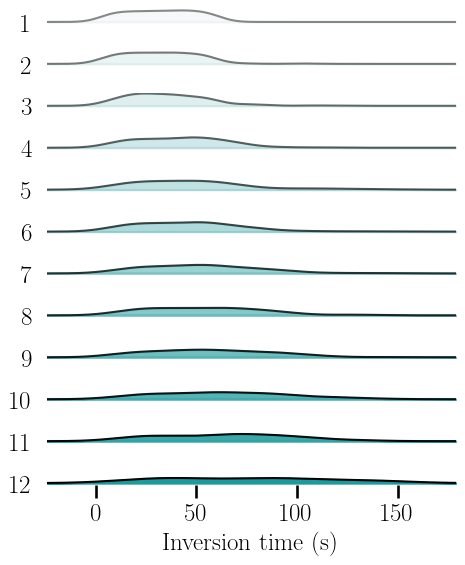

In [8]:
# pip install joypy  # if needed

import pandas as pd
import matplotlib.pyplot as plt
import joypy

# Ensure a clean, explicit order for layers
layer_order = sorted(df["layer"].unique())
df["layer"] = pd.Categorical(df["layer"], categories=layer_order, ordered=True)
dfp = df.sort_values("layer")

import matplotlib.pyplot as plt
import joypy

dfp_cut = dfp[dfp["inversion_time"] <= 150].copy()

fig, axes = joypy.joyplot(
    dfp_cut,
    by="layer",
    column="inversion_time",
    overlap=1.15,
    linewidth=1.5,
    figsize=(5, 6),
    colormap=sns.light_palette(palette['Dark cyan'], as_cmap=True),
    hist=False,
    fade=True,
)

axes[-1].set_xlabel("Inversion time (s)")
plt.tight_layout()

plt.savefig('../figures/sipit_layer_ablation.pdf', bbox_inches='tight')
plt.show()



/media/donato/Extra-storage/Code/other/plots/.venv/lib/python3.13/site-packages/joypy/joyplot.py:176: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(by)


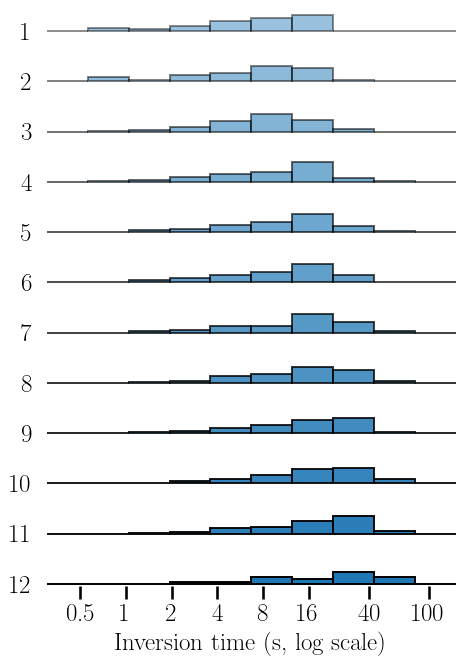

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joypy

# --- Prep (order & filter) ---
layer_order = sorted(df["layer"].unique())
dfp = df.copy()
dfp["layer"] = pd.Categorical(dfp["layer"], categories=layer_order, ordered=True)
dfp = dfp.sort_values("layer")
dfp = dfp[(dfp["inversion_time"] > 0) & (dfp["inversion_time"] <= 150)].copy()

# log-transform to avoid log-axis rendering issues
dfp["log_t"] = np.log10(dfp["inversion_time"].astype(float))

# --- Colormap from your palette anchor color ---
base_key = next((k for k in ["Dark cyan","Dark Cyan","dark_cyan","dark cyan"] if k in palette), None)
base_color = palette[base_key] if base_key else "#007f7f"
cmap = sns.light_palette(base_color, as_cmap=True, reverse=False)

fig_h = 7
fig_w = 5.0

fig, axes = joypy.joyplot(
    dfp,
    by="layer",
    column="log_t",
    overlap=1.2,
    linewidth=1.4,
    figsize=(fig_w, fig_h),
    colormap=cmap,
    fade=True,
    hist=True
)

# Nice log ticks shown in seconds
tick_secs = np.array([0.5, 1, 2, 4, 8, 16, 40, 100])
tick_locs = np.log10(tick_secs)

axes[-1].set_xlim(np.log10(0.3), np.log10(150))
axes[-1].set_xticks(tick_locs)
axes[-1].set_xticklabels([f"{t:g}" for t in tick_secs])
axes[-1].set_xlabel("Inversion time (s, log scale)")

plt.tight_layout()
plt.savefig("../figures/sipit_layer_ablation.pdf", dpi=120)
plt.show()
